In [1]:
# Imports
from random import *
import pandas as pd
    
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.externals import joblib
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import dateutil.parser as dateparser
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix

import itertools

from sklearn.utils import resample

from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

import time

from sklearn.base import clone as cloneClassifier

In [3]:
df = pd.read_csv('votos_deputados.csv',encoding='cp850')

In [4]:
###filter voters
df

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8364,8365,8370,8374,8440,8538,8541,nome,partido,uf
0,178957.0,ObstruþÒo,NaN,Sim,NÒo,Sim,Sim,Sim,NÒo,Sim,...,NaN,NaN,NaN,NÒo,Sim,NÒo,NÒo,ABEL MESQUITA JR.,PDT,RR
1,178864.0,Sim,Sim,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,Sim,Sim,ADAIL CARNEIRO,PHS,CE
2,178914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NÒo,Sim,NÒo,NÒo,NaN,Sim,NÒo,ADALBERTO CAVALCANTI,PTB,PE
3,178890.0,ObstruþÒo,ObstruþÒo,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NÒo,NÒo,ADELMO CARNEIRO LE├O,PT,MG
4,178968.0,Sim,Sim,Sim,Sim,Sim,Sim,NÒo,NÒo,NÒo,...,NÒo,Sim,NÒo,NÒo,NaN,NÒo,NÒo,ADELSON BARRETO,PTB,SE
5,133374.0,NÒo,NaN,Sim,NÒo,NÒo,NÒo,NÒo,NÒo,NÒo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADEMIR CAMILO,PROS,MG
6,178903.0,NaN,NÒo,Sim,Sim,Sim,NÒo,NÒo,NÒo,NÒo,...,NÒo,Sim,NÒo,NÒo,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT
7,141372.0,NaN,NaN,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NÒo,NaN,NÒo,NÒo,NaN,Sim,NÒo,AELTON FREITAS,PR,MG
8,160508.0,NÒo,NaN,NaN,NÒo,Sim,Sim,Sim,Sim,Sim,...,Sim,ObstruþÒo,ObstruþÒo,ObstruþÒo,Sim,NÒo,NÒo,AFONSO FLORENCE,PT,BA
9,136811.0,Sim,Sim,NaN,Sim,NÒo,NÒo,NÒo,NÒo,NÒo,...,NÒo,NaN,NÒo,NaN,Sim,Sim,NÒo,AFONSO HAMM,PP,RS


In [6]:
##take a look

train_data = pd.get_dummies(df[df.columns[:-3]], columns=df.columns[:-3])
train_data

,Unnamed: 0_4930.0,Unnamed: 0_4931.0,Unnamed: 0_62881.0,Unnamed: 0_64960.0,Unnamed: 0_66179.0,Unnamed: 0_66828.0,Unnamed: 0_67138.0,Unnamed: 0_67312.0,Unnamed: 0_69871.0,Unnamed: 0_72442.0,...,8374_Sim,8440_Art. 17,8440_NÒo,8440_Sim,8538_AbstenþÒo,8538_NÒo,8538_Sim,8541_AbstenþÒo,8541_NÒo,8541_Sim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [7]:
def calculateAndApplyPCA(training_data, threshold=0.95, show=False):
    pca = PCA()
    pca.fit(training_data)
    training_data_pca = pca.transform(training_data)

    pca_analysis_data = list(map(lambda x : sum(pca.explained_variance_ratio_[0:x]), range(len(training_data_pca[1,:]))))
    
    optimal_dimensions = [ n for n,i in enumerate(pca_analysis_data) if i>threshold ][0]
    
    if show:
        fig, ax = plt.subplots()
        ax.plot(pca_analysis_data)
        ax.set_title('accumulated sum of information')
        plt.show()
    print(optimal_dimensions,'dimensions have a total accumulated information of',pca_analysis_data[optimal_dimensions])
    
    return [pca, training_data_pca, optimal_dimensions]

def scaleAllFeatures(training_data, ss=StandardScaler()):
    #ss = StandardScaler()

    # fit scaler on numeric_features
    ss.fit(training_data)

    # scale numeric features now
    training_data_scale = training_data.copy()
    training_data_scale = ss.transform(training_data_scale)
    
    return [ss, training_data_scale]

from sklearn.cluster import KMeans



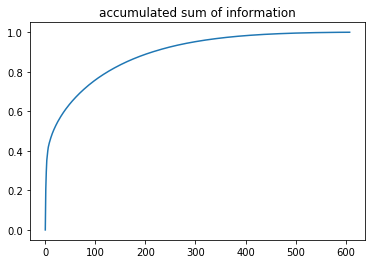

295 dimensions have a total accumulated information of 0.9501858208725015


In [8]:
###pca

[pca, votes_pca, optimal_dimensions] = calculateAndApplyPCA(train_data, show=True)

In [11]:
#train and test a model
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(votes_pca)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [12]:
###silhouette search

max_clusters = 50
random_state = 42
X = votes_pca

silhouettes = np.zeros(max_clusters)

for i in range(2, max_clusters):
    model = KMeans(n_clusters=i, random_state=random_state)
    y_pred = model.fit_predict(X)
    silhouettes[i] = metrics.silhouette_score(X, y_pred)
    print(i, 'silhouette', silhouettes[i])

2 silhouette 0.15505229921934655
3 silhouette 0.12781335760689752
4 silhouette 0.12255500025843749
5 silhouette 0.12483188042208156
6 silhouette 0.10543722673103166
7 silhouette 0.09567445181849127
8 silhouette 0.09173213045746927
9 silhouette 0.08339840191453107
10 silhouette 0.07686490812484754
11 silhouette 0.08863282784998512
12 silhouette 0.0566498788277833
13 silhouette 0.0673433056228317
14 silhouette 0.06167418679101053
15 silhouette 0.04612725889064603
16 silhouette 0.05821204507417398
17 silhouette 0.06077906983784485
18 silhouette 0.06339897980140727
19 silhouette 0.05802834701483095
20 silhouette 0.0581266602187766
21 silhouette 0.04489168888278288
22 silhouette 0.02953243226202187
23 silhouette 0.05098609045144821
24 silhouette 0.053072105661142385
25 silhouette 0.047435785568539605
26 silhouette 0.03778724998278358
27 silhouette 0.037995782230526354
28 silhouette 0.021646410196210213
29 silhouette 0.04669672951165779
30 silhouette 0.03322859708046807
31 silhouette 0.03276

In [13]:

def plotCluster(X, y_pred):
    plt.figure(figsize=(12, 12))

    plt.subplot(421)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Dimensions: 0x1; Clusters: "+str(1+max(y_pred)))

    plt.subplot(422)
    plt.scatter(X[:, 0], X[:, 2], c=y_pred)
    plt.title("Dimensions: 0x2; Clusters: "+str(1+max(y_pred)))

    plt.subplot(423)
    plt.scatter(X[:, 0], X[:, 3], c=y_pred)
    plt.title("Dimensions: 0x3; Clusters: "+str(1+max(y_pred)))

    plt.subplot(424)
    plt.scatter(X[:, 0], X[:, 4], c=y_pred)
    plt.title("Dimensions: 0x4; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(425)
    plt.scatter(X[:, 0], X[:, 5], c=y_pred)
    plt.title("Dimensions: 0x5; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(426)
    plt.scatter(X[:, 0], X[:, 6], c=y_pred)
    plt.title("Dimensions: 0x6; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(427)
    plt.scatter(X[:, 0], X[:, 7], c=y_pred)
    plt.title("Dimensions: 0x7; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(428)
    plt.scatter(X[:, 0], X[:, 8], c=y_pred)
    plt.title("Dimensions: 0x8; Clusters: "+str(1+max(y_pred)))

    plt.show()

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, y_pred, sample_size=10000))

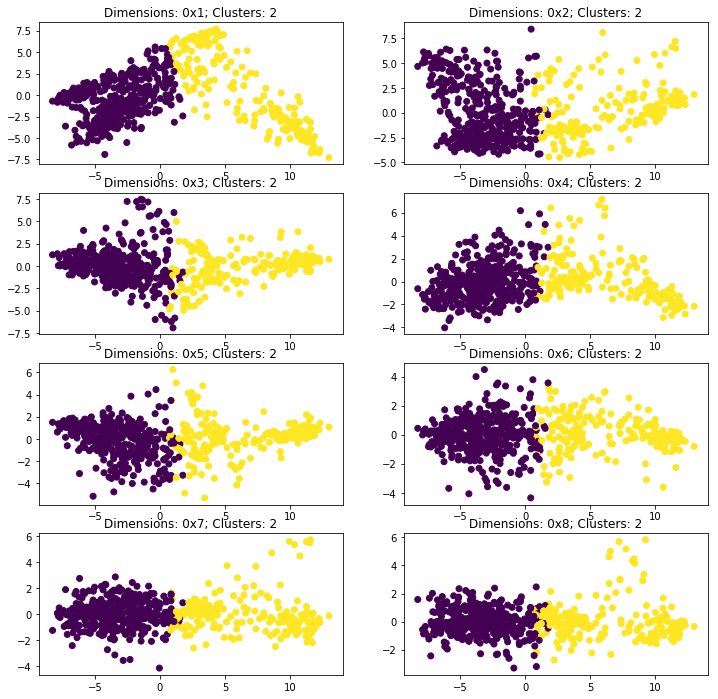

Silhouette Coefficient: 0.155


In [14]:
#train and plot proper clusters

model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(votes_pca)

plotCluster(votes_pca, y_pred)

In [17]:
#check results
results = df.copy()
results['cluster'] = y_pred
results

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
0,178957.0,ObstruþÒo,NaN,Sim,NÒo,Sim,Sim,Sim,NÒo,Sim,...,NaN,NaN,NÒo,Sim,NÒo,NÒo,ABEL MESQUITA JR.,PDT,RR,0
1,178864.0,Sim,Sim,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NaN,NaN,NaN,NaN,Sim,Sim,ADAIL CARNEIRO,PHS,CE,0
2,178914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sim,NÒo,NÒo,NaN,Sim,NÒo,ADALBERTO CAVALCANTI,PTB,PE,0
3,178890.0,ObstruþÒo,ObstruþÒo,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NaN,NaN,NaN,NaN,NÒo,NÒo,ADELMO CARNEIRO LE├O,PT,MG,1
4,178968.0,Sim,Sim,Sim,Sim,Sim,Sim,NÒo,NÒo,NÒo,...,Sim,NÒo,NÒo,NaN,NÒo,NÒo,ADELSON BARRETO,PTB,SE,0
5,133374.0,NÒo,NaN,Sim,NÒo,NÒo,NÒo,NÒo,NÒo,NÒo,...,NaN,NaN,NaN,NaN,NaN,NaN,ADEMIR CAMILO,PROS,MG,0
6,178903.0,NaN,NÒo,Sim,Sim,Sim,NÒo,NÒo,NÒo,NÒo,...,Sim,NÒo,NÒo,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,0
7,141372.0,NaN,NaN,Sim,NÒo,Sim,Sim,Sim,Sim,Sim,...,NaN,NÒo,NÒo,NaN,Sim,NÒo,AELTON FREITAS,PR,MG,0
8,160508.0,NÒo,NaN,NaN,NÒo,Sim,Sim,Sim,Sim,Sim,...,ObstruþÒo,ObstruþÒo,ObstruþÒo,Sim,NÒo,NÒo,AFONSO FLORENCE,PT,BA,1
9,136811.0,Sim,Sim,NaN,Sim,NÒo,NÒo,NÒo,NÒo,NÒo,...,NaN,NÒo,NaN,Sim,Sim,NÒo,AFONSO HAMM,PP,RS,0


In [17]:
#analyse



,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
6,178903.0,null,Não,Sim,Sim,Sim,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,2
9,136811.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,null,Não,null,Sim,Sim,Não,AFONSO HAMM,PP,RS,2
14,73579.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,ALBERTO FRAGA,DEM,DF,2
15,160559.0,null,Sim,Sim,Não,Não,Não,Não,Não,Não,...,Sim,Não,Não,null,Sim,Não,ALCEU MOREIRA,PMDB,RS,2
18,178972.0,null,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Não,Sim,Não,ALEX MANENTE,PPS,SP,2
46,160602.0,Obstrução,Não,Sim,null,null,null,null,null,null,...,null,Não,Não,Sim,Sim,null,ARNALDO JORDY,PPS,PA,2
55,73655.0,Não,Sim,Sim,Sim,Não,Não,Não,Não,Não,...,Não,Sim,Não,Sim,Não,Não,AUGUSTO CARVALHO,Solidaried,DF,2
56,160665.0,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,AUGUSTO COUTINHO,Solidaried,PE,2
57,160512.0,null,null,null,Sim,Não,Não,Não,Não,Não,...,null,null,Não,Sim,Sim,null,AUREO,Solidaried,RJ,2
62,74535.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,null,Não,BENITO GAMA,PTB,BA,2
